In [69]:
#importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [2]:
df=pd.read_csv('demandforecastdata.csv')
df

,record_ID,week,store_id,sku_id,total_price,base_price,is_featured_sku,is_display_sku,units_sold
0,1,17/01/11,8091,216418,99.0375,111.8625,0,0,20
1,2,17/01/11,8091,216419,99.0375,99.0375,0,0,28
2,3,17/01/11,8091,216425,133.9500,133.9500,0,0,19
3,4,17/01/11,8091,216233,133.9500,133.9500,0,0,44
4,5,17/01/11,8091,217390,141.0750,141.0750,0,0,52
...,...,...,...,...,...,...,...,...,...
150145,212638,09/07/13,9984,223245,235.8375,235.8375,0,0,38
150146,212639,09/07/13,9984,223153,235.8375,235.8375,0,0,30
150147,212642,09/07/13,9984,245338,357.6750,483.7875,1,1,31
150148,212643,09/07/13,9984,547934,141.7875,191.6625,0,1,12


In [3]:
#Preprocessing the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150150 entries, 0 to 150149
Data columns (total 9 columns):
record_ID          150150 non-null int64
week               150150 non-null object
store_id           150150 non-null int64
sku_id             150150 non-null int64
total_price        150149 non-null float64
base_price         150150 non-null float64
is_featured_sku    150150 non-null int64
is_display_sku     150150 non-null int64
units_sold         150150 non-null int64
dtypes: float64(2), int64(6), object(1)
memory usage: 10.3+ MB


In [4]:
df.drop(columns=['record_ID'], inplace=True)

In [5]:
df.isnull().sum()

week               0
store_id           0
sku_id             0
total_price        1
base_price         0
is_featured_sku    0
is_display_sku     0
units_sold         0
dtype: int64

In [6]:
df['total_price'].value_counts()

205.9125    7048
213.0375    5272
177.4125    4544
469.5375    4489
227.2875    4150
            ... 
52.7250        1
527.2500       1
421.8000       1
496.6125       1
517.2750       1
Name: total_price, Length: 646, dtype: int64

In [7]:
df[df['total_price'].isna()]

,week,store_id,sku_id,total_price,base_price,is_featured_sku,is_display_sku,units_sold
136949,23/04/13,9436,245338,NaN,469.5375,0,0,1


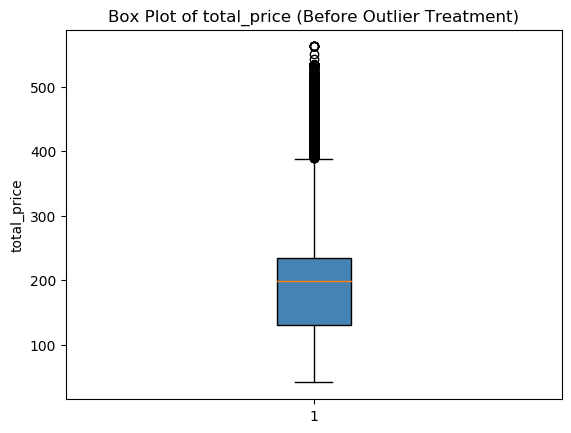

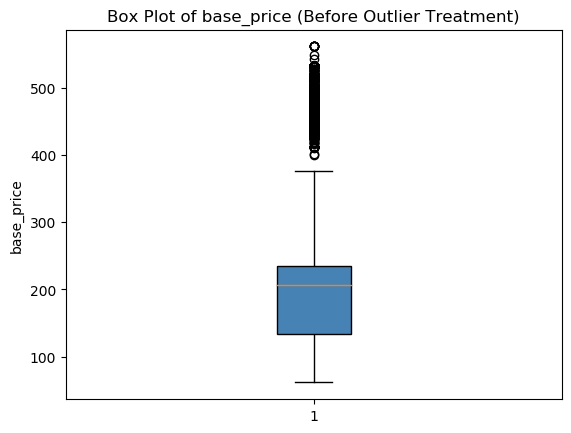

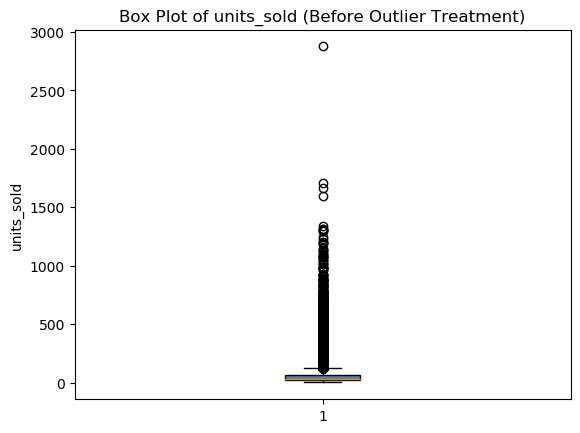

In [8]:
cols = ['total_price', 'base_price', 'units_sold']

for col in cols:
    plt.figure()
    plt.boxplot(
        df[col].dropna(),
        patch_artist=True,
        boxprops=dict(facecolor='steelblue')
    )
    plt.title(f"Box Plot of {col} (Before Outlier Treatment)")
    plt.ylabel(col)
    plt.show()

In [9]:
def remove_outliers_iqr(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    return df[(df[col] >= lower) & (df[col] <= upper)]


In [10]:
df_clean = df.copy()

for col in ['total_price', 'base_price']:
    df_clean = remove_outliers_iqr(df_clean, col)

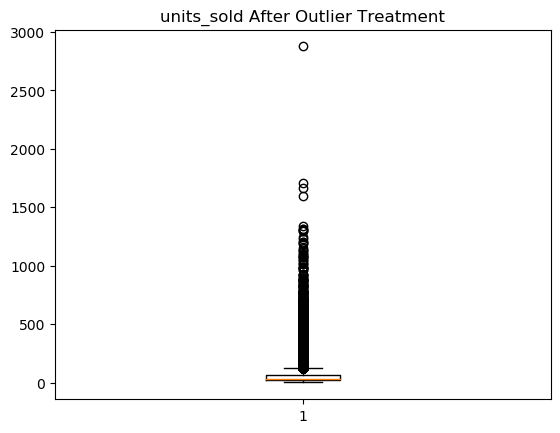

In [11]:
plt.boxplot(df['units_sold'])
plt.title('units_sold After Outlier Treatment')
plt.show()

In [12]:
upper_cap = df['units_sold'].quantile(0.99)
df['units_sold'] = df['units_sold'].clip(upper=upper_cap)

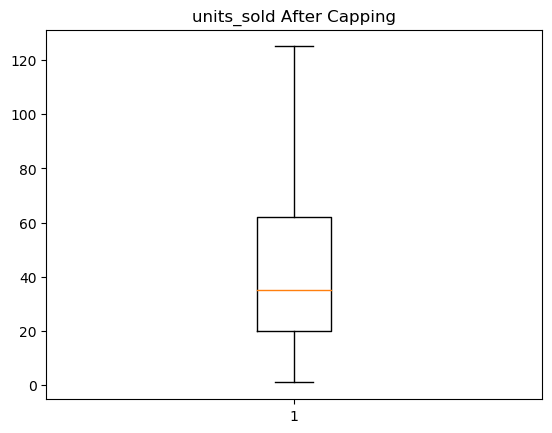

In [13]:
plt.boxplot(df['units_sold'], showfliers=False)
plt.title('units_sold After Capping')
plt.show()


In [47]:
# Convert 'week' to datetime
df_clean['week'] = pd.to_datetime(df_clean['week'], format='%d/%m/%y')

In [48]:
# Extract time-based features
df_clean['year'] = df_clean['week'].dt.year
df_clean['month'] = df_clean['week'].dt.month
df_clean['week_of_year'] = df_clean['week'].dt.week
df_clean['quarter'] = df_clean['week'].dt.quarter

Univariate

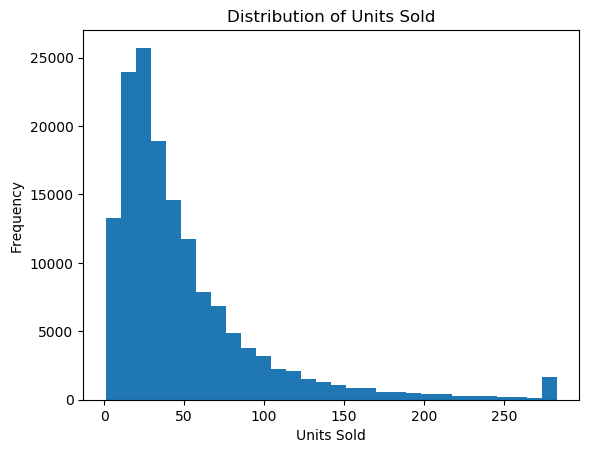

In [26]:
# Units Sold - Histogram

plt.figure()
plt.hist(df['units_sold'], bins=30)
plt.xlabel('Units Sold')
plt.ylabel('Frequency')
plt.title('Distribution of Units Sold')
plt.show()


C:\Users\khavy\anaconda3\envs\aiml\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  


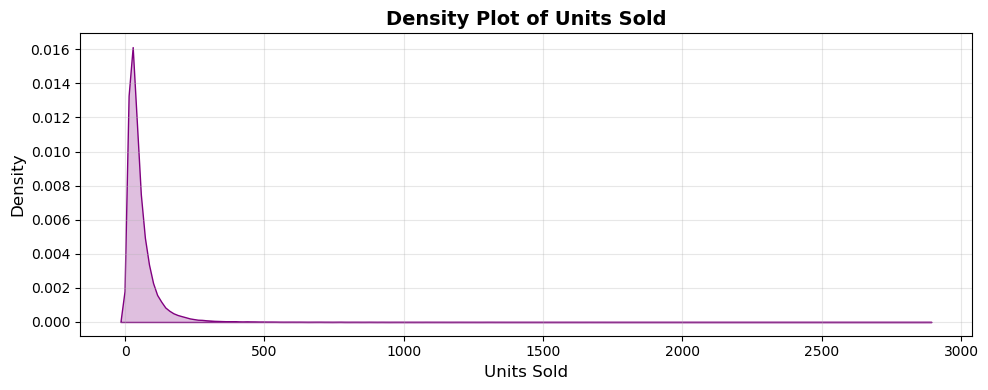

In [30]:
plt.figure(figsize=(10, 4))
sns.kdeplot(df_clean['units_sold'], shade=True, color='purple')
plt.xlabel('Units Sold', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.title('Density Plot of Units Sold', fontsize=14, fontweight='bold')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

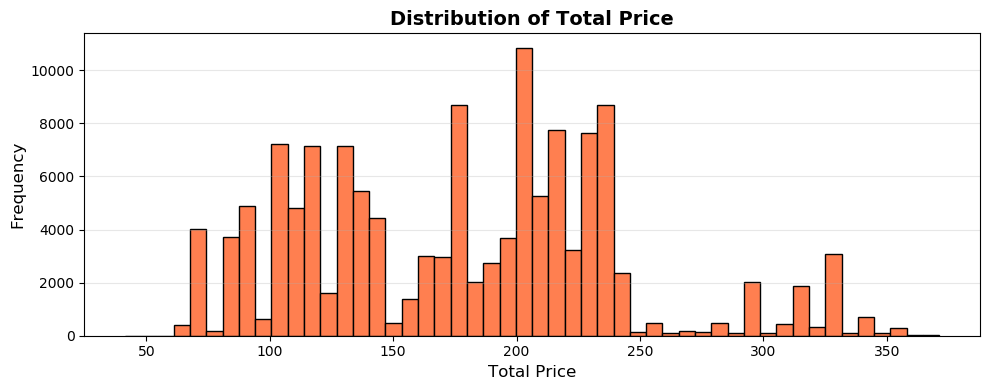

In [29]:
# Total Price - Histogram

plt.figure(figsize=(10, 4))
plt.hist(df_clean['total_price'].dropna(), bins=50, color='coral', edgecolor='black')
plt.xlabel('Total Price', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('Distribution of Total Price', fontsize=14, fontweight='bold')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

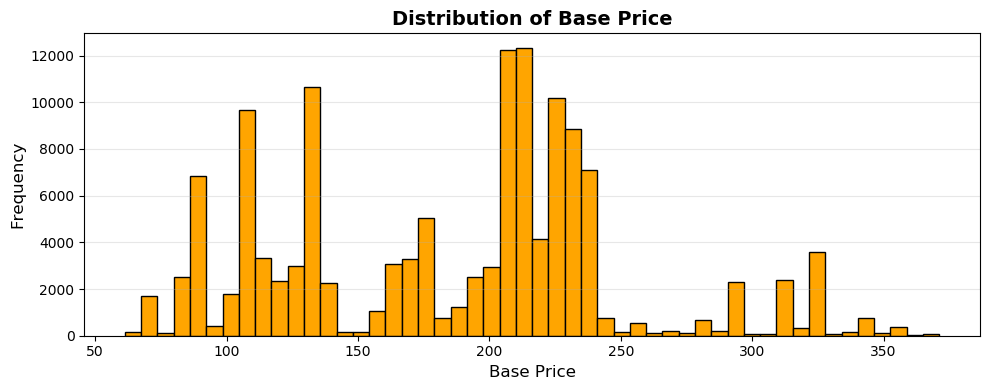

In [31]:
# Base Price - Histogram

plt.figure(figsize=(10, 4))
plt.hist(df_clean['base_price'], bins=50, color='orange', edgecolor='black')
plt.xlabel('Base Price', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('Distribution of Base Price', fontsize=14, fontweight='bold')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

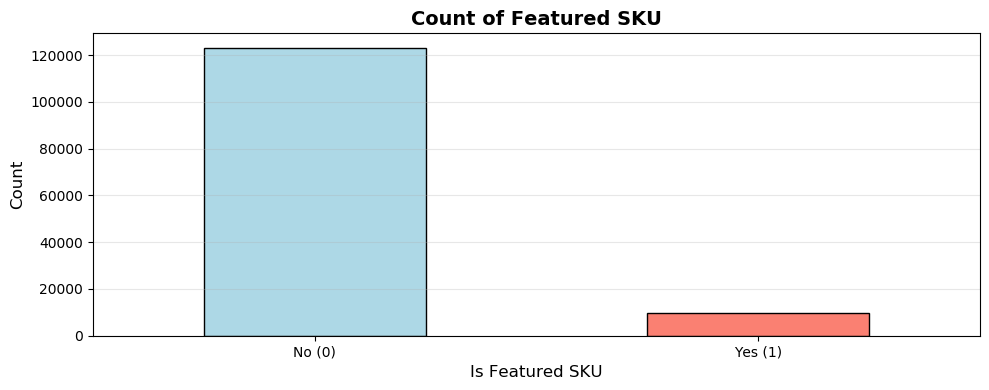

In [34]:
# Is Featured SKU - Count Plot

plt.figure(figsize=(10, 4))
df_clean['is_featured_sku'].value_counts().plot(kind='bar', color=['lightblue', 'salmon'], edgecolor='black')
plt.xlabel('Is Featured SKU', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Count of Featured SKU', fontsize=14, fontweight='bold')
plt.xticks([0, 1], ['No (0)', 'Yes (1)'], rotation=0)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

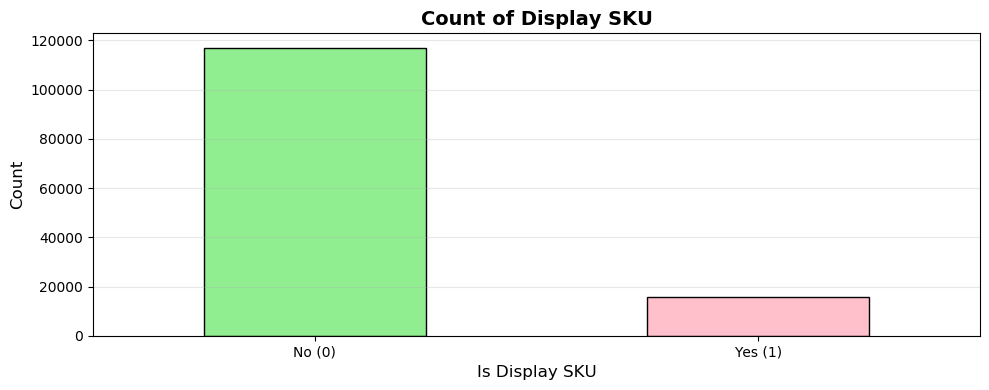

In [36]:
# Is Display SKU - Count Plot

plt.figure(figsize=(10, 4))
df_clean['is_display_sku'].value_counts().plot(kind='bar', color=['lightgreen', 'pink'], edgecolor='black')
plt.xlabel('Is Display SKU', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Count of Display SKU', fontsize=14, fontweight='bold')
plt.xticks([0, 1], ['No (0)', 'Yes (1)'], rotation=0)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

Bivariate

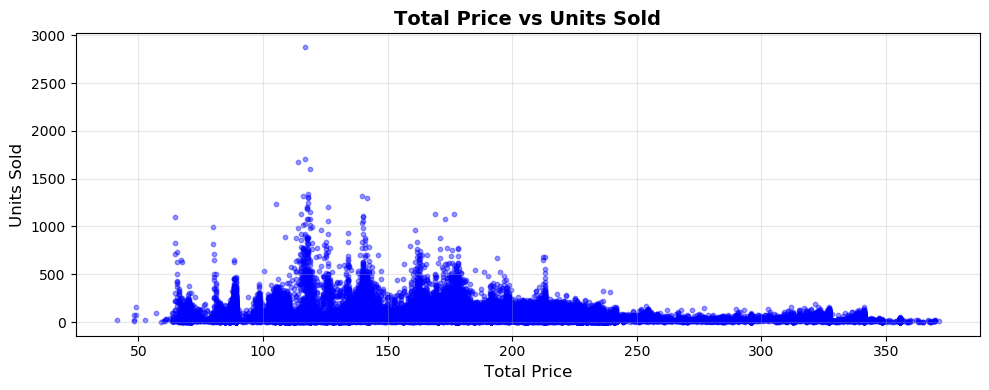

In [39]:
plt.figure(figsize=(10, 4))
plt.scatter(df_clean['total_price'], df_clean['units_sold'], alpha=0.4, s=10, color='blue')
plt.xlabel('Total Price', fontsize=12)
plt.ylabel('Units Sold', fontsize=12)
plt.title('Total Price vs Units Sold', fontsize=14, fontweight='bold')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

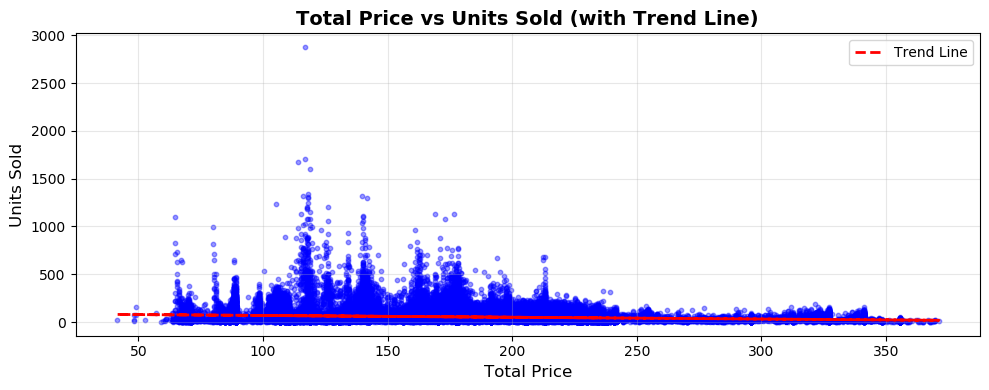

In [43]:
plt.figure(figsize=(10, 4))
plt.scatter(df_clean['total_price'], df_clean['units_sold'], alpha=0.4, s=10, color='blue')

# Add trend line
z = np.polyfit(df_clean['total_price'], df_clean['units_sold'], 1)
p = np.poly1d(z)
plt.plot(df_clean['total_price'], p(df_clean['total_price']), "r--", linewidth=2, label='Trend Line')

plt.xlabel('Total Price', fontsize=12)
plt.ylabel('Units Sold', fontsize=12)
plt.title('Total Price vs Units Sold (with Trend Line)', fontsize=14, fontweight='bold')
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

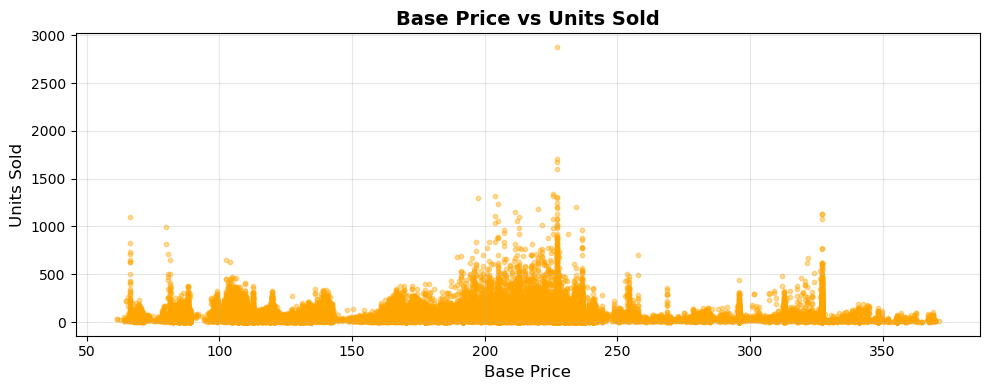

In [44]:
plt.figure(figsize=(10, 4))
plt.scatter(df_clean['base_price'], df_clean['units_sold'], alpha=0.4, s=10, color='orange')
plt.xlabel('Base Price', fontsize=12)
plt.ylabel('Units Sold', fontsize=12)
plt.title('Base Price vs Units Sold', fontsize=14, fontweight='bold')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

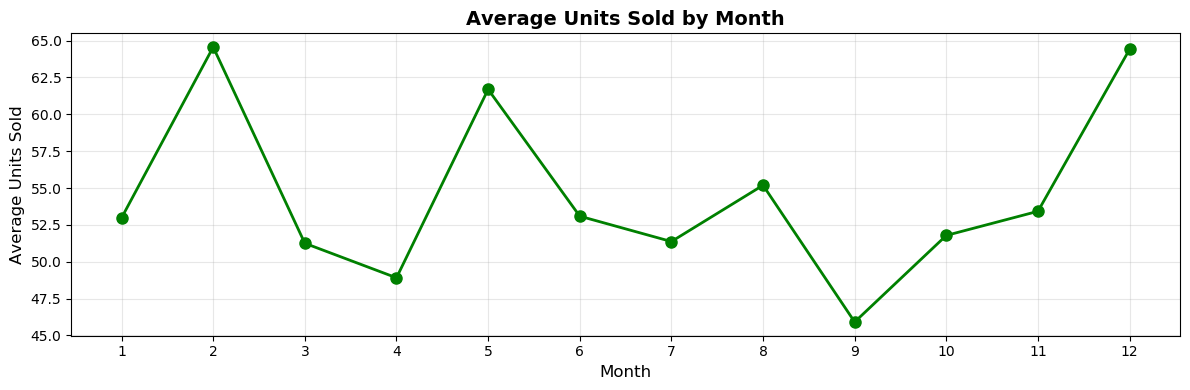

In [52]:
monthly_avg = df_clean.groupby('month')['units_sold'].mean()

plt.figure(figsize=(12, 4))
plt.plot(monthly_avg.index, monthly_avg.values, marker='o', linewidth=2, markersize=8, color='green')
plt.xlabel('Month', fontsize=12)
plt.ylabel('Average Units Sold', fontsize=12)
plt.title('Average Units Sold by Month', fontsize=14, fontweight='bold')
plt.xticks(range(1, 13))
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

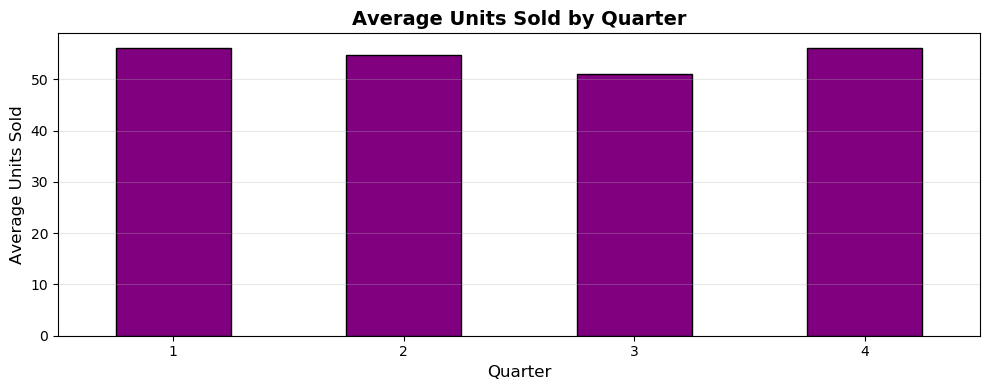

In [51]:
quarterly_avg = df_clean.groupby('quarter')['units_sold'].mean()

plt.figure(figsize=(10, 4))
quarterly_avg.plot(kind='bar', color='purple', edgecolor='black')
plt.xlabel('Quarter', fontsize=12)
plt.ylabel('Average Units Sold', fontsize=12)
plt.title('Average Units Sold by Quarter', fontsize=14, fontweight='bold')
plt.xticks(rotation=0)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

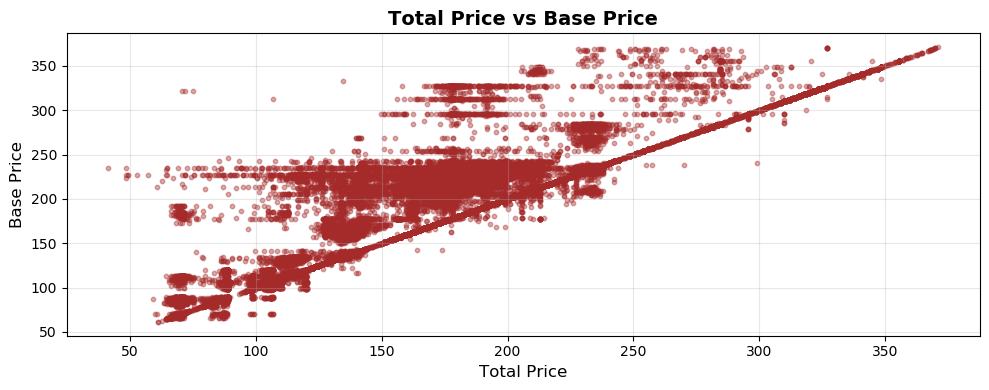

In [63]:
plt.figure(figsize=(10, 4))
plt.scatter(df_clean['total_price'], df_clean['base_price'], alpha=0.4, s=10, color='brown')
plt.xlabel('Total Price', fontsize=12)
plt.ylabel('Base Price', fontsize=12)
plt.title('Total Price vs Base Price', fontsize=14, fontweight='bold')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

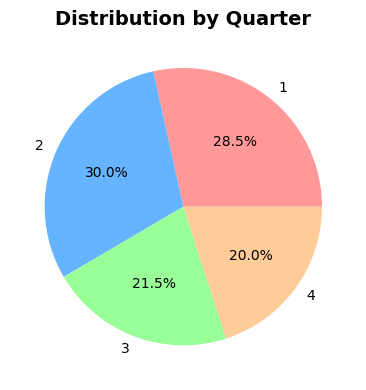

In [66]:
plt.figure(figsize=(10, 4))
df_clean['quarter'].value_counts().sort_index().plot(
    kind='pie',
    autopct='%1.1f%%',
    colors=['#ff9999', '#66b3ff', '#99ff99', '#ffcc99']
)
plt.ylabel('')
plt.title('Distribution by Quarter', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()


In [67]:
# Numeric columns
num_features = ['base_price', 'total_price', 'discount', 'discount_pct']  

# Categorical features → one-hot encoding
cat_features = ['store_id', 'sku_id', 'week'] 
df = pd.get_dummies(df, columns=cat_features, drop_first=True)

# Target
y = df['units_sold']  # or 'units_sold_log' if using log transform
X = df.drop(['units_sold'], axis=1)


In [72]:
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

In [75]:
import numpy as np
import pandas as pd

# Check in features
print("NaNs in X_train_scaled:", np.isnan(X_train_scaled).sum())
print("Infinite values in X_train_scaled:", np.isinf(X_train_scaled).sum())

# Check in target
print("NaNs in y_train:", np.isnan(y_train).sum())
print("Infinite values in y_train:", np.isinf(y_train).sum())


NaNs in X_train_scaled: 1
Infinite values in X_train_scaled: 0
NaNs in y_train: 0
Infinite values in y_train: 0


In [77]:
# If only a few rows have NaNs
mask = ~np.isnan(X_train_scaled).any(axis=1) & ~np.isnan(y_train)
X_train_scaled = X_train_scaled[mask]
y_train = y_train[mask]

In [73]:
#Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [78]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train_scaled, y_train)
y_pred_lr = lr.predict(X_test_scaled)


In [79]:
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)
y_pred_lr = lr.predict(X_test_scaled)

mae_lr = mean_absolute_error(y_test, y_pred_lr)
rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))
print(f"Linear Regression → MAE: {mae_lr:.2f}, RMSE: {rmse_lr:.2f}")


Linear Regression → MAE: 21.73, RMSE: 31.16
